In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the dataset
eda_data_df = pd.read_csv('/content/drive/MyDrive/COMS4995AML-Proj/code/Project/data/eda_data.csv')
glassdoor_jobs_df = pd.read_csv('/content/drive/MyDrive/COMS4995AML-Proj/code/Project/data/glassdoor_jobs.csv')
salary_data_cleaned_df = pd.read_csv('/content/drive/MyDrive/COMS4995AML-Proj/code/Project/data/salary_data_cleaned.csv')

# I use eda_data_df in the following exploration. Maybe we can decide which df to use?

In [5]:
eda_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         742 non-null    int64  
 1   Job Title          742 non-null    object 
 2   Salary Estimate    742 non-null    object 
 3   Job Description    742 non-null    object 
 4   Rating             742 non-null    float64
 5   Company Name       742 non-null    object 
 6   Location           742 non-null    object 
 7   Headquarters       742 non-null    object 
 8   Size               742 non-null    object 
 9   Founded            742 non-null    int64  
 10  Type of ownership  742 non-null    object 
 11  Industry           742 non-null    object 
 12  Sector             742 non-null    object 
 13  Revenue            742 non-null    object 
 14  Competitors        742 non-null    object 
 15  hourly             742 non-null    int64  
 16  employer_provided  742 non

In [6]:
# split data into features and label
eda_data_df = eda_data_df.drop('Unnamed: 0', axis=1)
eda_data_X = eda_data_df.drop(columns=['avg_salary']) 
eda_data_y = eda_data_df['avg_salary']

<ipython-input-7-961651333de4>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = eda_data_X.corr()


<Axes: >

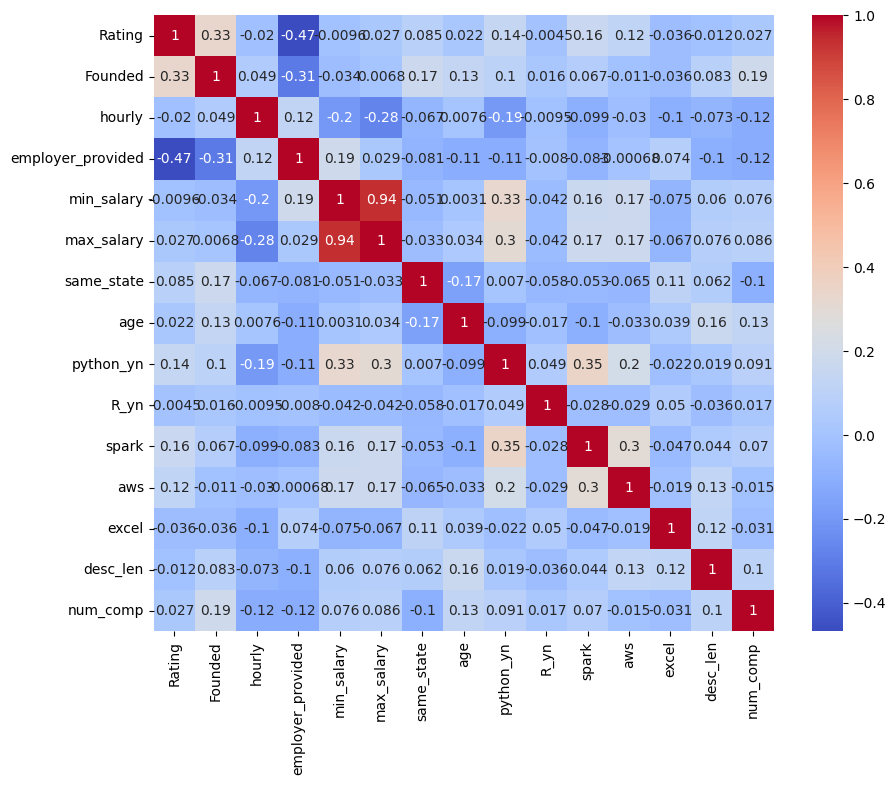

In [7]:
# calculate the correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = eda_data_X.corr()
plt.tight_layout()
# create a heatmap using Seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [8]:
glassdoor_jobs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         956 non-null    int64  
 1   Job Title          956 non-null    object 
 2   Salary Estimate    956 non-null    object 
 3   Job Description    956 non-null    object 
 4   Rating             956 non-null    float64
 5   Company Name       956 non-null    object 
 6   Location           956 non-null    object 
 7   Headquarters       956 non-null    object 
 8   Size               956 non-null    object 
 9   Founded            956 non-null    int64  
 10  Type of ownership  956 non-null    object 
 11  Industry           956 non-null    object 
 12  Sector             956 non-null    object 
 13  Revenue            956 non-null    object 
 14  Competitors        956 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 112.2+ KB


In [9]:
salary_data_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          742 non-null    object 
 1   Salary Estimate    742 non-null    object 
 2   Job Description    742 non-null    object 
 3   Rating             742 non-null    float64
 4   Company Name       742 non-null    object 
 5   Location           742 non-null    object 
 6   Headquarters       742 non-null    object 
 7   Size               742 non-null    object 
 8   Founded            742 non-null    int64  
 9   Type of ownership  742 non-null    object 
 10  Industry           742 non-null    object 
 11  Sector             742 non-null    object 
 12  Revenue            742 non-null    object 
 13  Competitors        742 non-null    object 
 14  hourly             742 non-null    int64  
 15  employer_provided  742 non-null    int64  
 16  min_salary         742 non

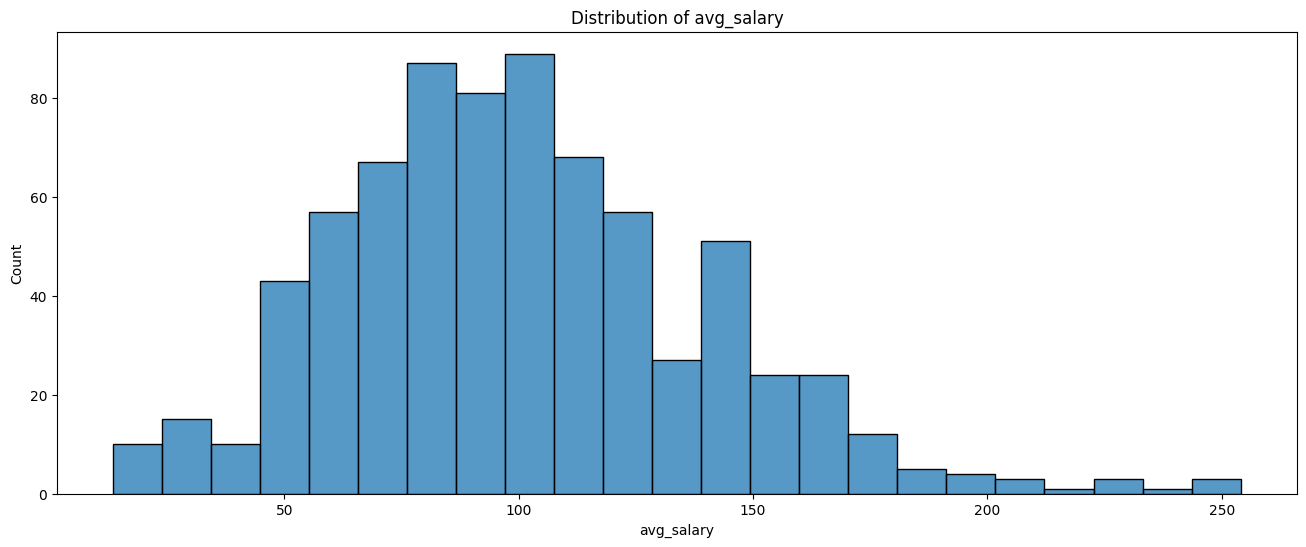

In [10]:
plt.figure(figsize=(16, 6))
plt.title('Distribution of avg_salary') 
ax = (sns.histplot(data=eda_data_df, x='avg_salary'))
plt.show()

# Numerical features

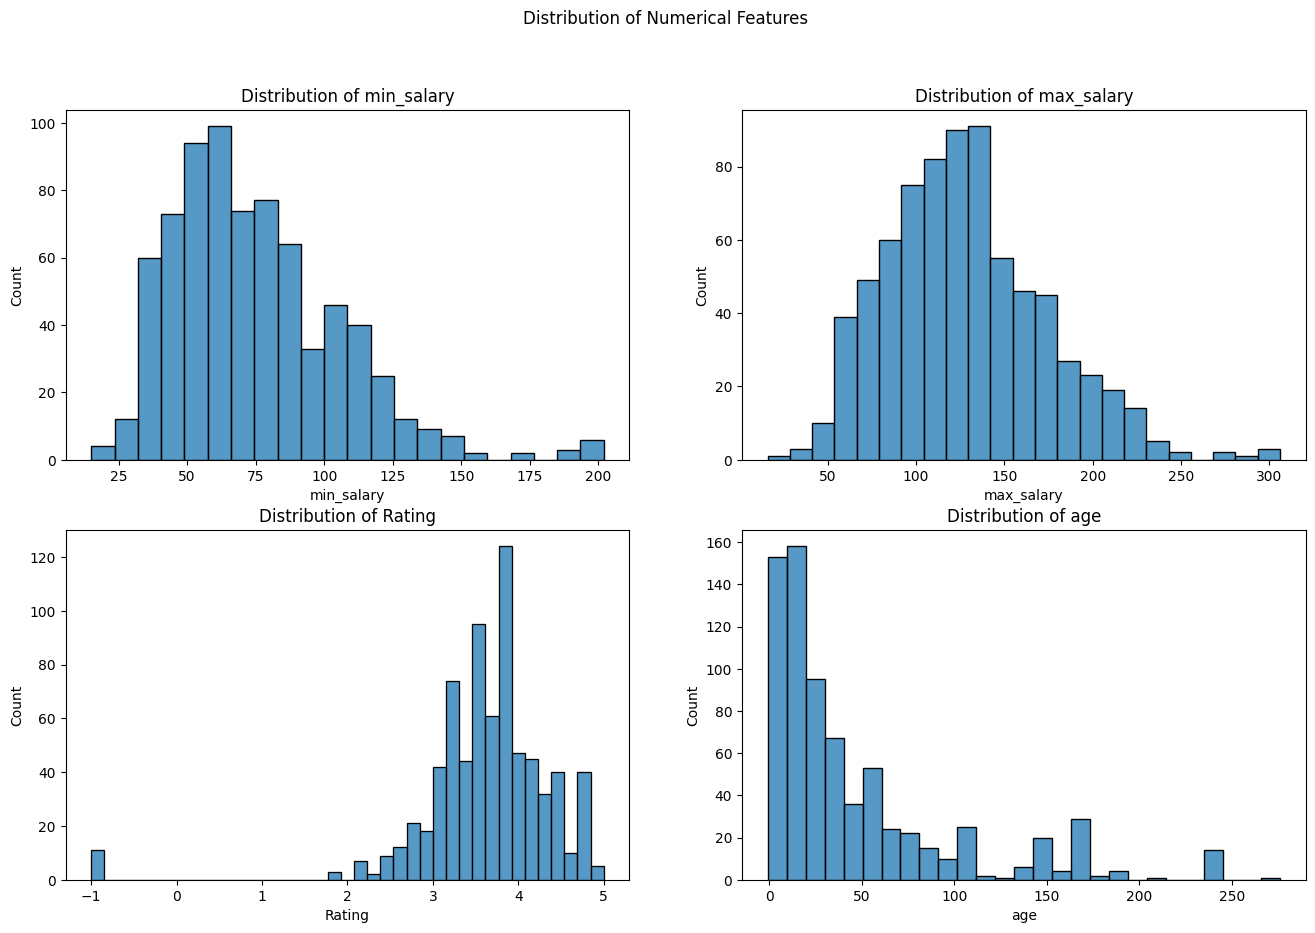

In [11]:
# numerical features
fig, axes = plt.subplots(2, 2, figsize=(16, 10)) 
fig.suptitle('Distribution of Numerical Features')
axes[0, 0].set_title('Distribution of min_salary') 
sns.histplot(ax=axes[0, 0], data=eda_data_df, x='min_salary') 
axes[0, 1].set_title('Distribution of max_salary') 
sns.histplot(ax=axes[0, 1], data=eda_data_df, x='max_salary') 
axes[1, 0].set_title('Distribution of Rating') 
sns.histplot(ax=axes[1, 0], data=eda_data_df, x='Rating') 
axes[1, 1].set_title('Distribution of age') 
sns.histplot(ax=axes[1, 1], data=eda_data_df, x='age') # age need to be cleaned because negative values exist
plt.show()

- min_salary, max_salary, and avg_salary are slightly right-skewed.
- There are some outliers in the age that need to be handled. (e.g. age < 0 and age > 120)

# Categorical features

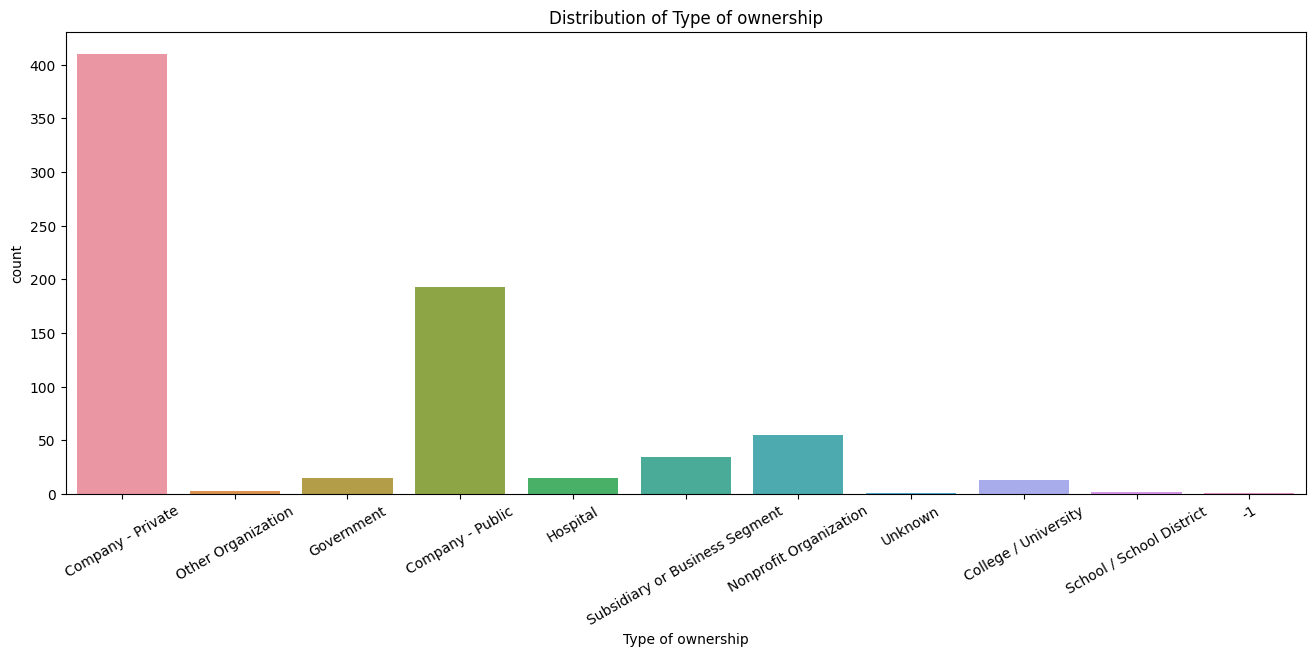

In [12]:
plt.figure(figsize=(16, 6))
plt.title('Distribution of Type of ownership') 
ax = (sns.countplot(data=eda_data_df, x='Type of ownership'))
ax.tick_params(axis='x', rotation=30)
plt.show()

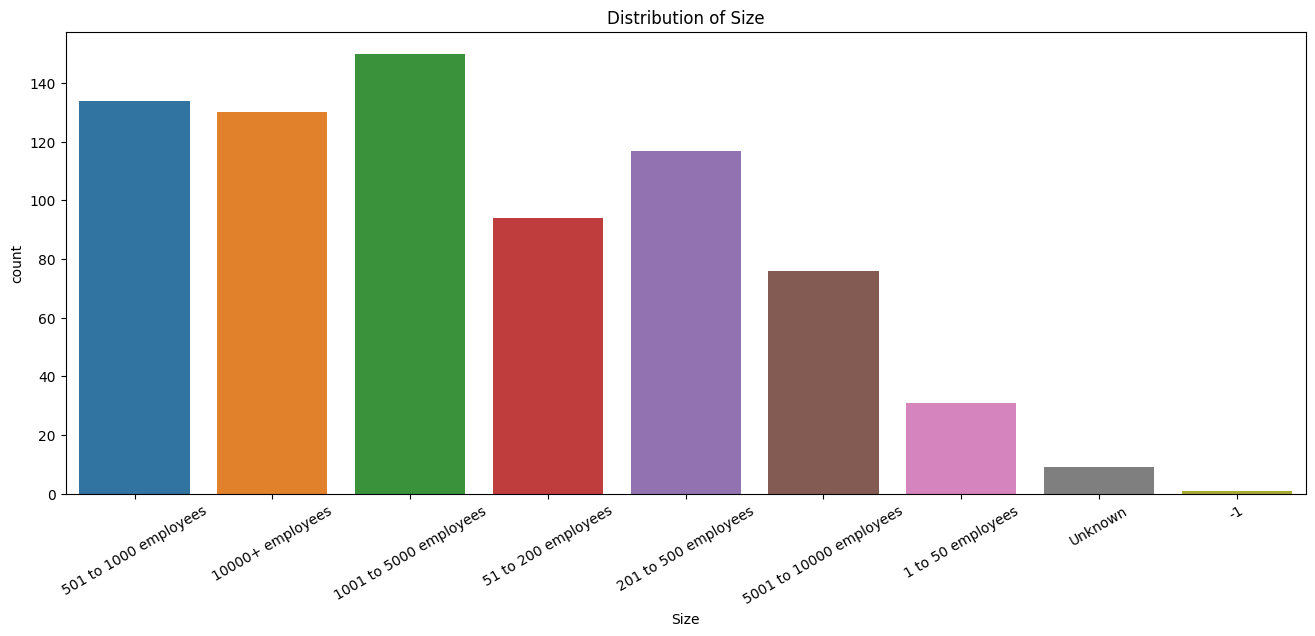

In [13]:
plt.figure(figsize=(16, 6))
plt.title('Distribution of Size') 
ax = (sns.countplot(data=eda_data_df, x='Size'))
ax.tick_params(axis='x', rotation=30)
plt.show()

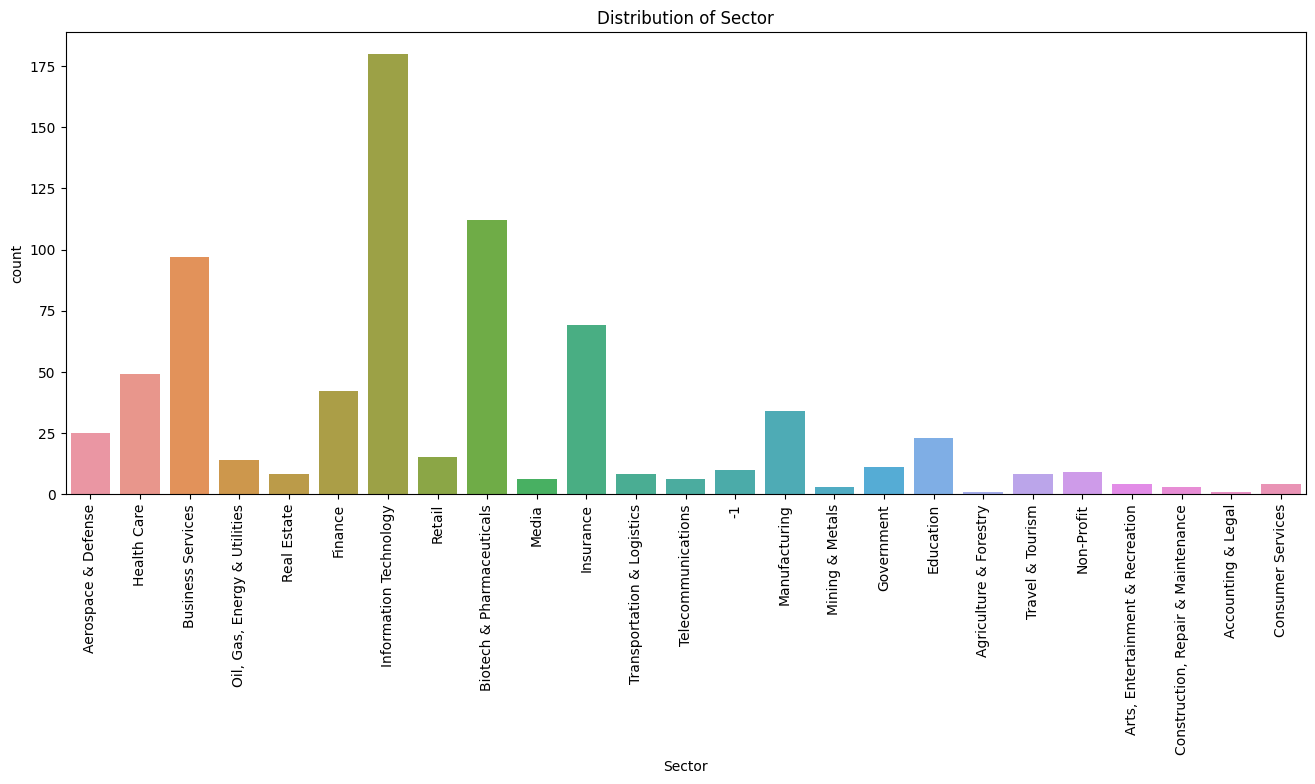

In [14]:
plt.figure(figsize=(16, 6))
plt.title('Distribution of Sector') 
ax = (sns.countplot(data=eda_data_df, x='Sector'))
ax.tick_params(axis='x', rotation=90)
plt.show()

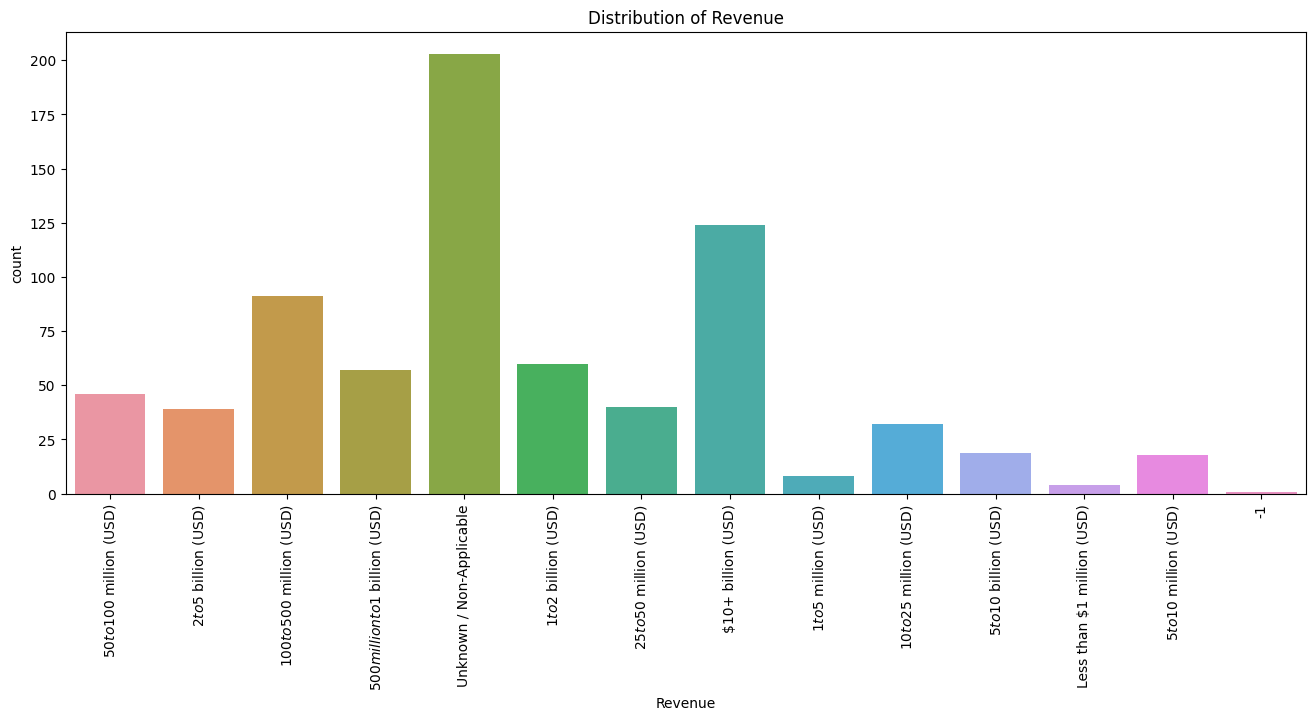

In [15]:
plt.figure(figsize=(16, 6))
plt.title('Distribution of Revenue') 
ax = (sns.countplot(data=eda_data_df, x='Revenue'))
ax.tick_params(axis='x', rotation=90)
plt.show()

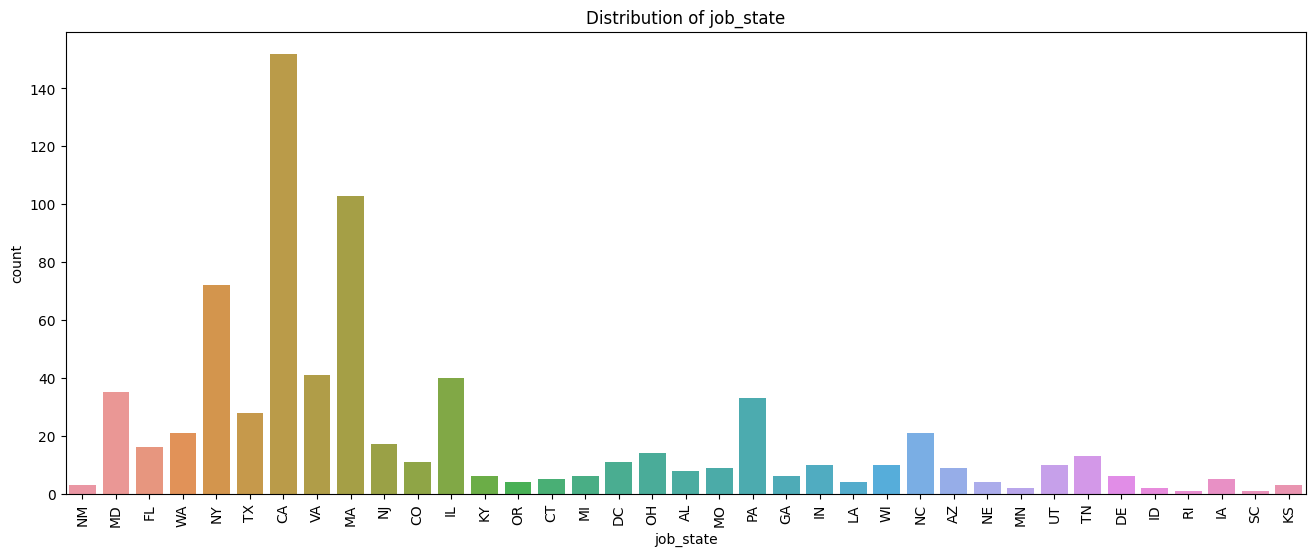

In [16]:
plt.figure(figsize=(16, 6))
plt.title('Distribution of job_state') 
ax = (sns.countplot(data=eda_data_df, x='job_state'))
ax.tick_params(axis='x', rotation=90)
plt.show()

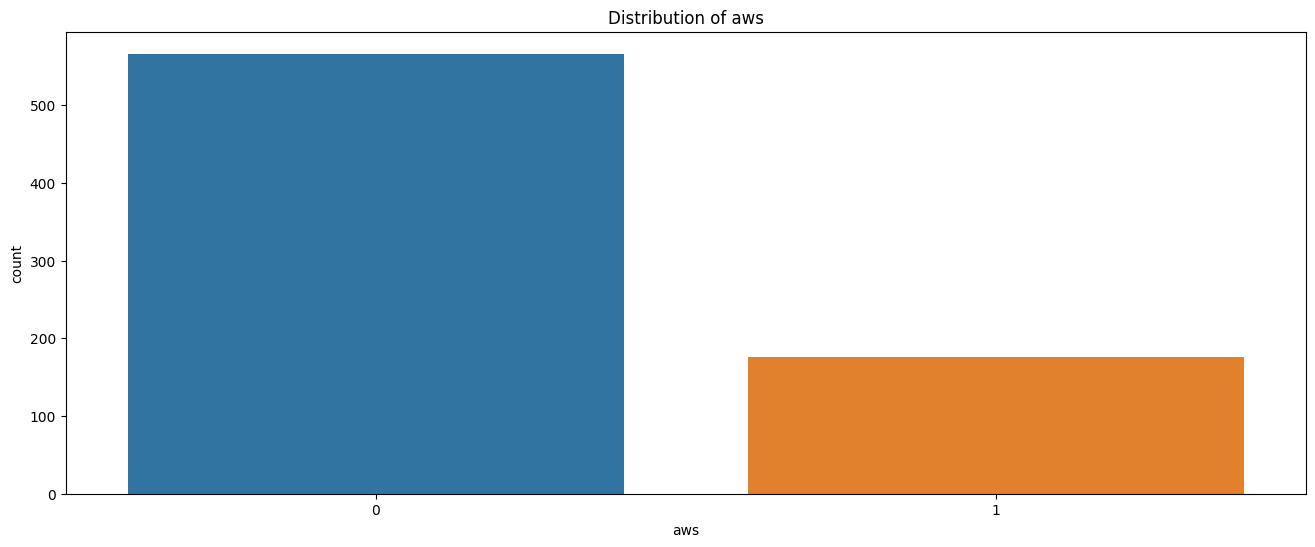

In [17]:
plt.figure(figsize=(16, 6))
plt.title('Distribution of aws') 
ax = (sns.countplot(data=eda_data_df, x='aws'))
plt.show()

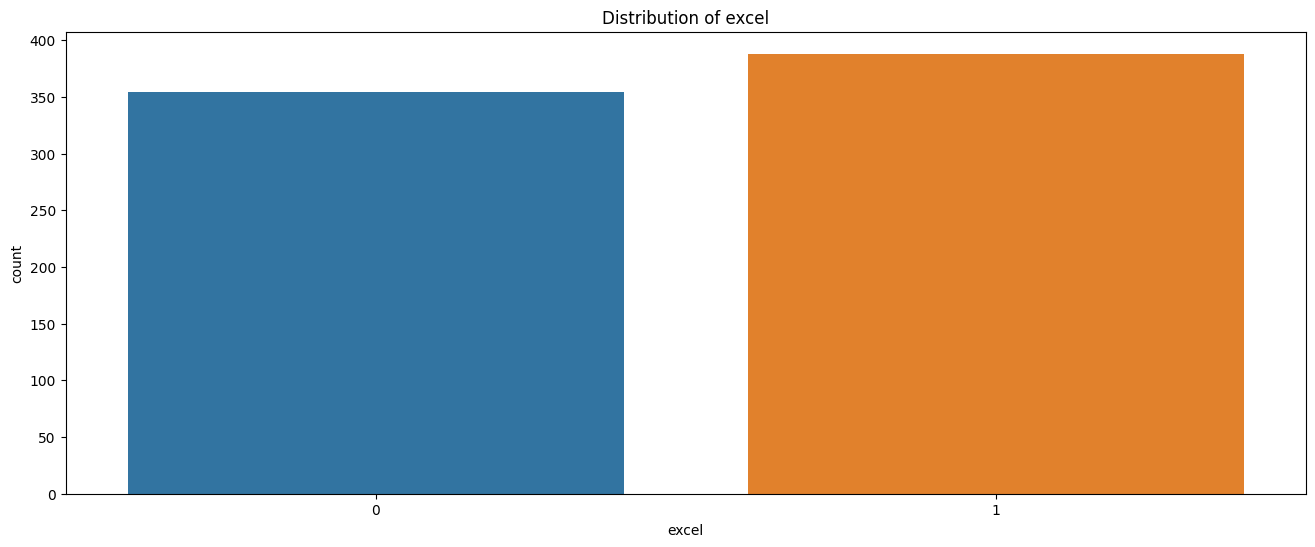

In [18]:
plt.figure(figsize=(16, 6))
plt.title('Distribution of excel') 
ax = (sns.countplot(data=eda_data_df, x='excel'))
plt.show()

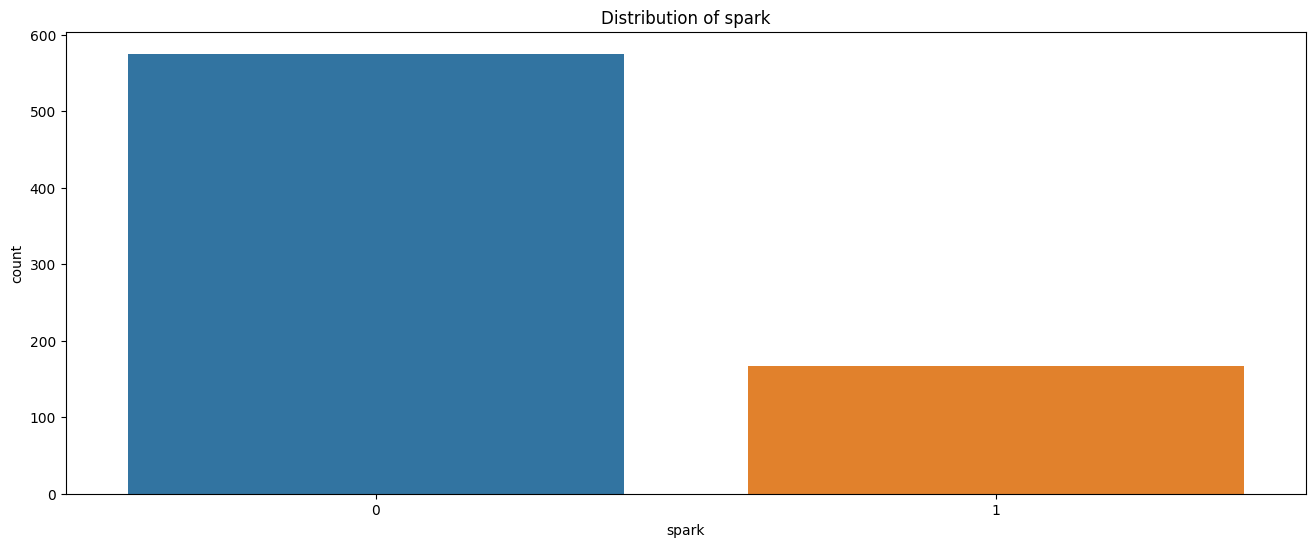

In [19]:
plt.figure(figsize=(16, 6))
plt.title('Distribution of spark') 
ax = (sns.countplot(data=eda_data_df, x='spark'))
plt.show()

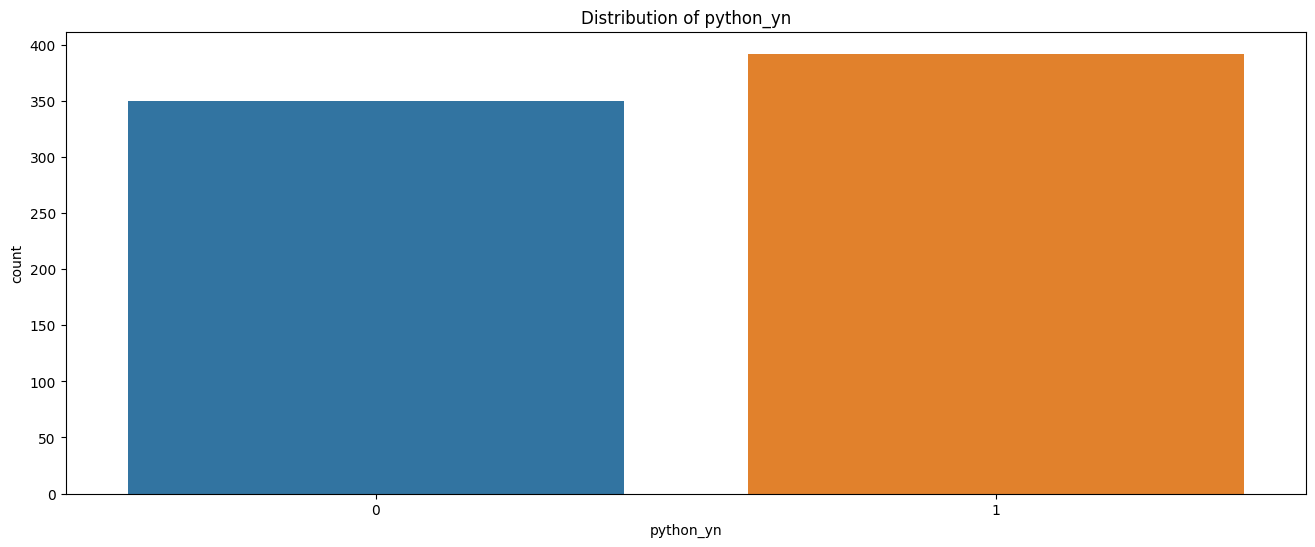

In [20]:
plt.figure(figsize=(16, 6))
plt.title('Distribution of python_yn') 
ax = (sns.countplot(data=eda_data_df, x='python_yn'))
plt.show()

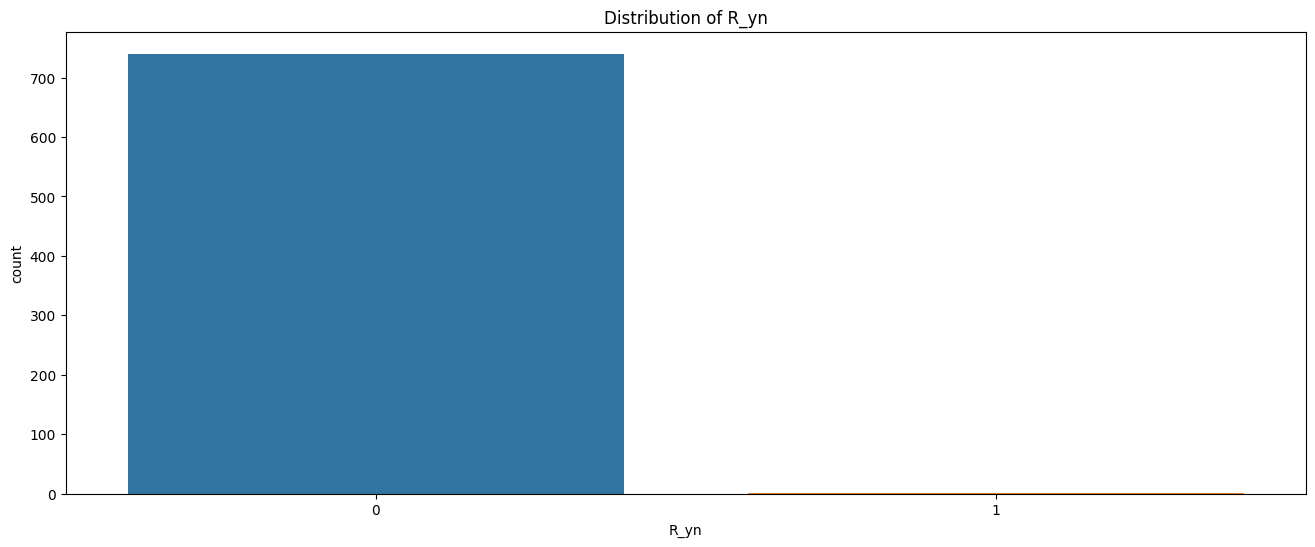

In [21]:
plt.figure(figsize=(16, 6))
plt.title('Distribution of R_yn') 
ax = (sns.countplot(data=eda_data_df, x='R_yn'))
plt.show()

# Relationship between features and target `avg_salary`

Since there are `min_salary`, `max_salary`, and `avg_salary` and I'm not sure which one to use as target, I simply pick `avg_salary` as it best describes the general situation of salary. We can further discuss about it.

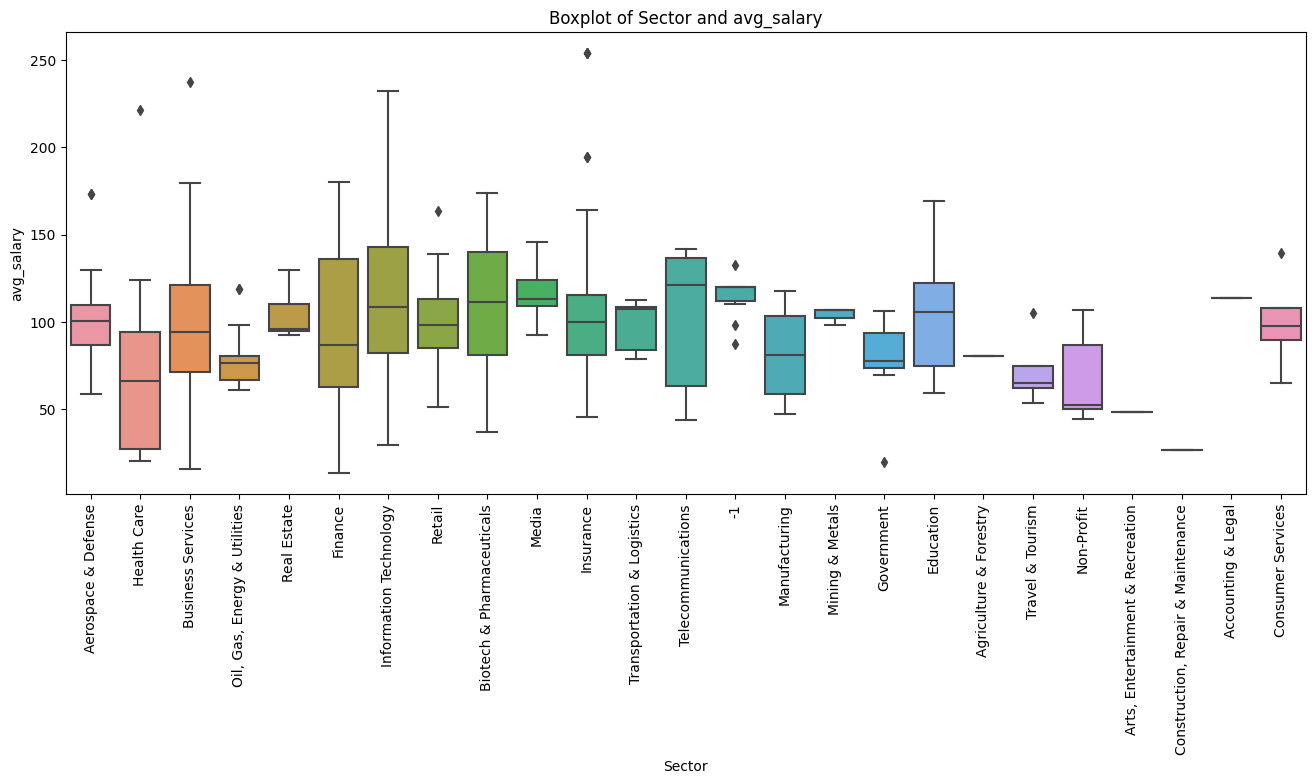

In [22]:
plt.figure(figsize=(16, 6))
plt.title('Boxplot of Sector and avg_salary') 
ax = (sns.boxplot(data=eda_data_df, x='Sector', y='avg_salary'))
ax.tick_params(axis='x', rotation=90)
plt.show()

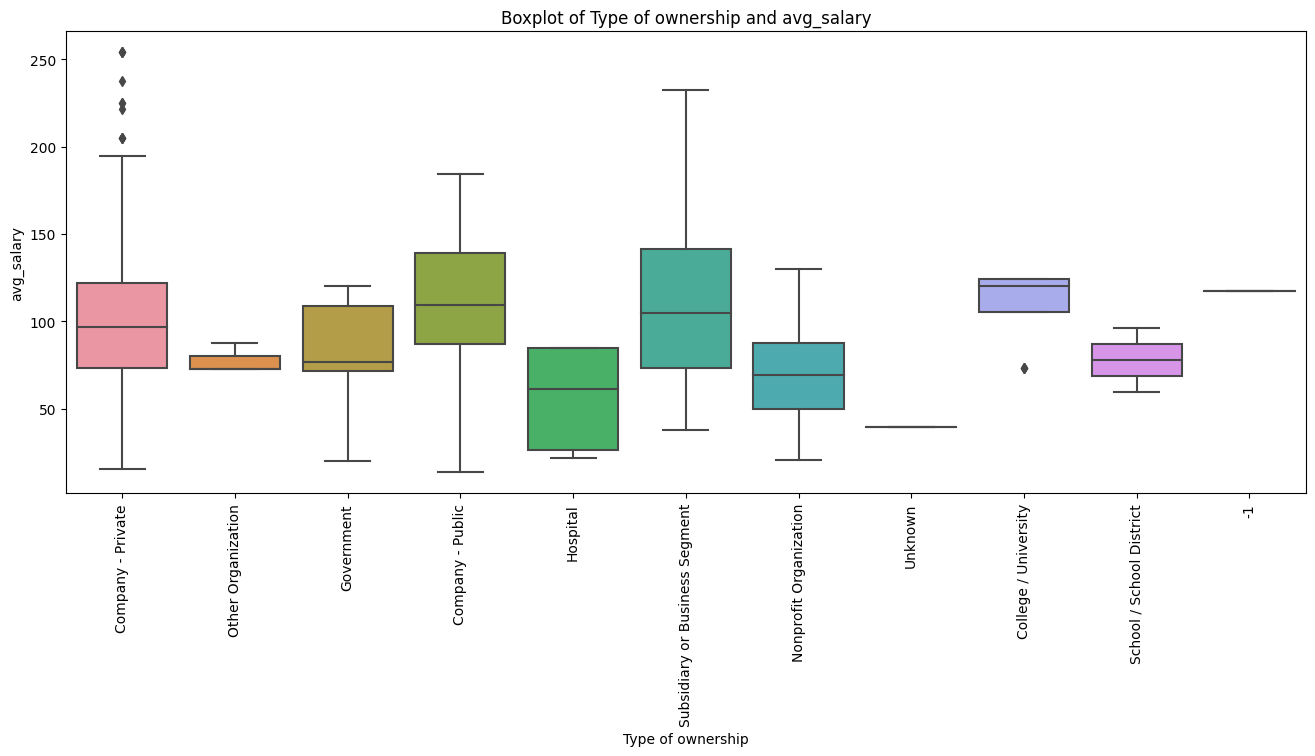

In [23]:
plt.figure(figsize=(16, 6))
plt.title('Boxplot of Type of ownership and avg_salary') 
ax = (sns.boxplot(data=eda_data_df, x='Type of ownership', y='avg_salary'))
ax.tick_params(axis='x', rotation=90)
plt.show()

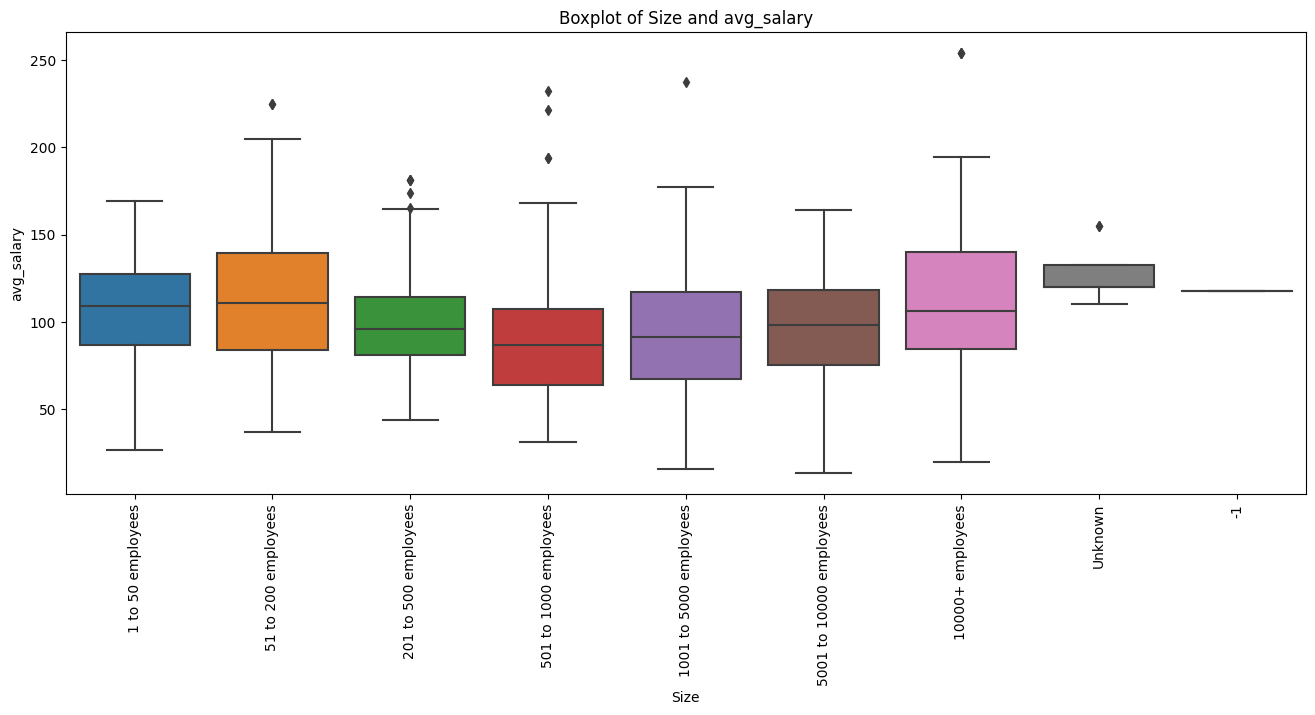

In [24]:
plt.figure(figsize=(16, 6))
plt.title('Boxplot of Size and avg_salary') 
ax = (sns.boxplot(data=eda_data_df, x='Size', y='avg_salary', 
                  order=['1 to 50 employees', '51 to 200 employees', 
                         '201 to 500 employees', '501 to 1000 employees', 
                         '1001 to 5000 employees', '5001 to 10000 employees', 
                         '10000+ employees', 'Unknown', '-1']))  # maybe drop unknown and -1?
ax.tick_params(axis='x', rotation=90)
plt.show()

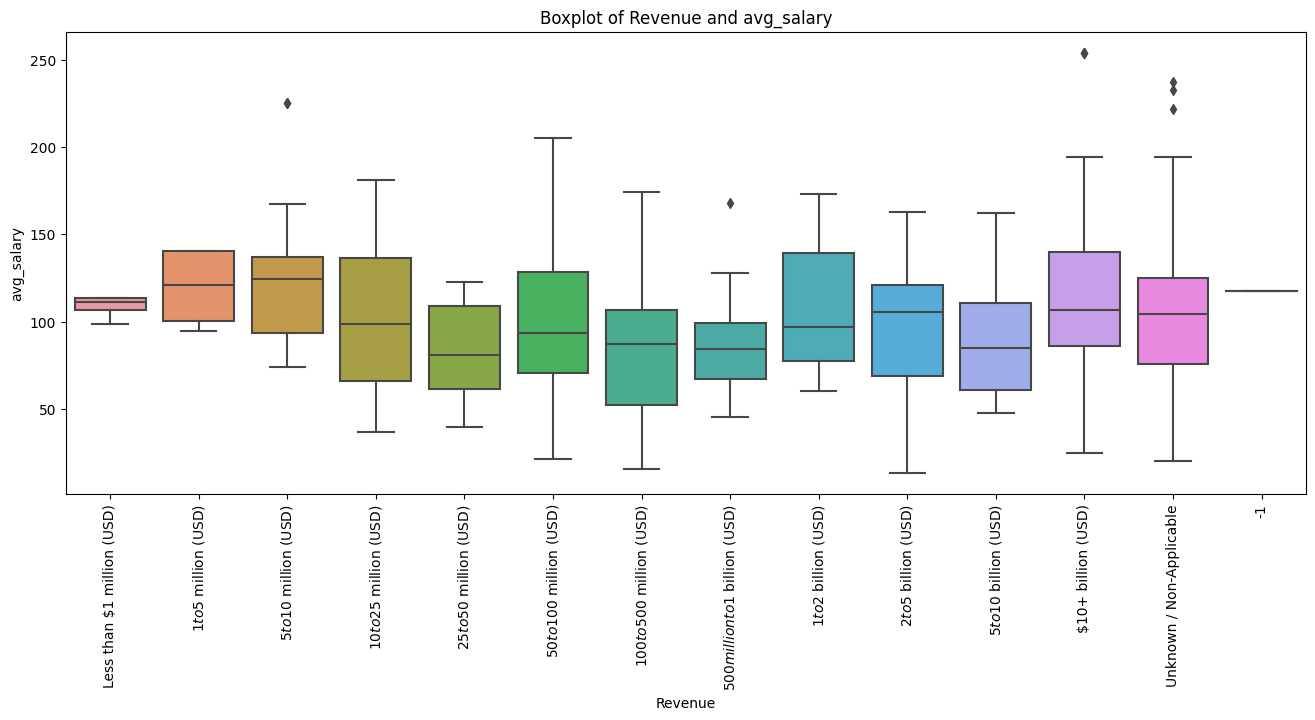

In [25]:
plt.figure(figsize=(16, 6))
plt.title('Boxplot of Revenue and avg_salary') 
ax = (sns.boxplot(data=eda_data_df, x='Revenue', y='avg_salary', 
                  order=['Less than $1 million (USD)', '$1 to $5 million (USD)', 
                         '$5 to $10 million (USD)', '$10 to $25 million (USD)', 
                         '$25 to $50 million (USD)', '$50 to $100 million (USD)', 
                         '$100 to $500 million (USD)', '$500 million to $1 billion (USD)',
                         '$1 to $2 billion (USD)', '$2 to $5 billion (USD)', 
                         '$5 to $10 billion (USD)', '$10+ billion (USD)', 
                         'Unknown / Non-Applicable', '-1']))  # maybe drop unknown and -1?
ax.tick_params(axis='x', rotation=90)
plt.show()

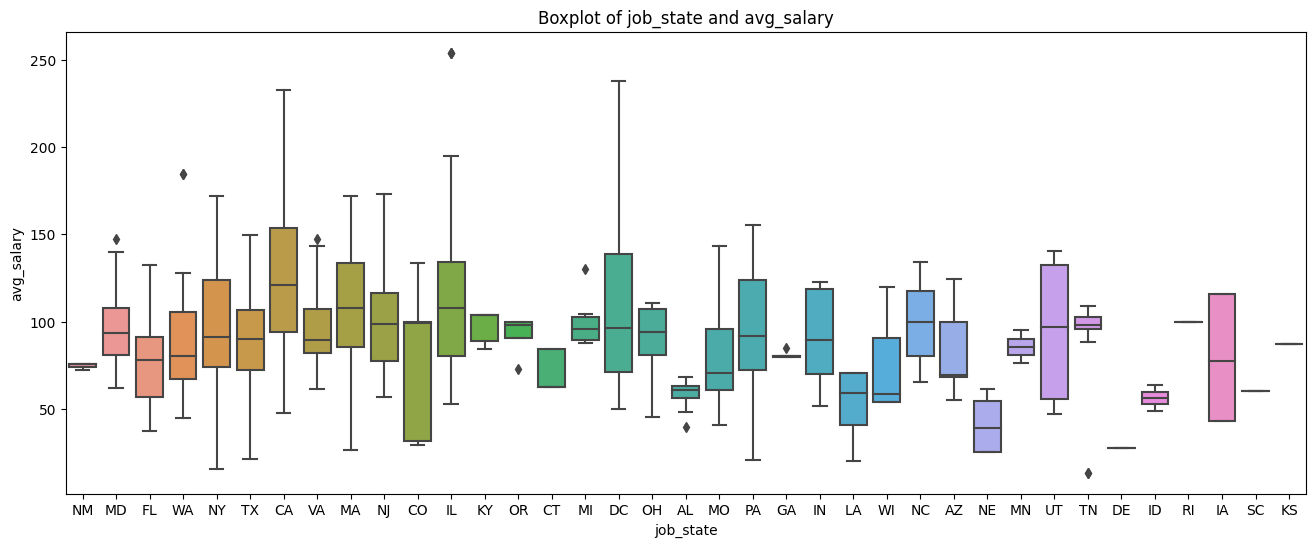

In [26]:
plt.figure(figsize=(16, 6))
plt.title('Boxplot of job_state and avg_salary') 
ax = (sns.boxplot(data=eda_data_df, x='job_state', y='avg_salary'))
plt.show()

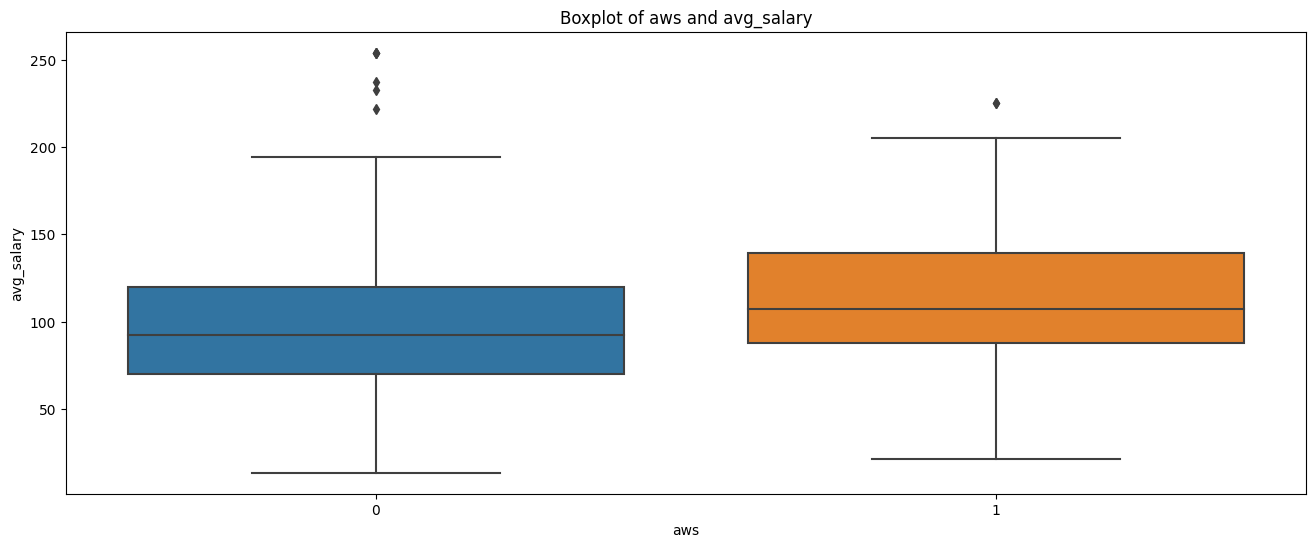

In [27]:
plt.figure(figsize=(16, 6))
plt.title('Boxplot of aws and avg_salary') 
ax = (sns.boxplot(data=eda_data_df, x='aws', y='avg_salary'))
plt.show()

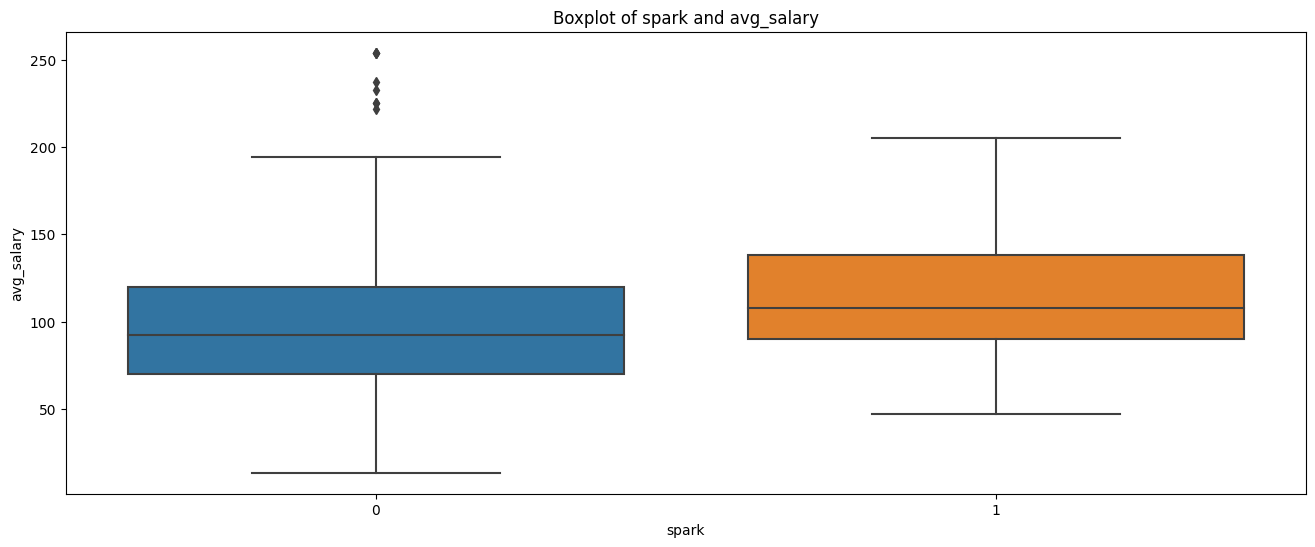

In [28]:
plt.figure(figsize=(16, 6))
plt.title('Boxplot of spark and avg_salary') 
ax = (sns.boxplot(data=eda_data_df, x='spark', y='avg_salary'))
plt.show()

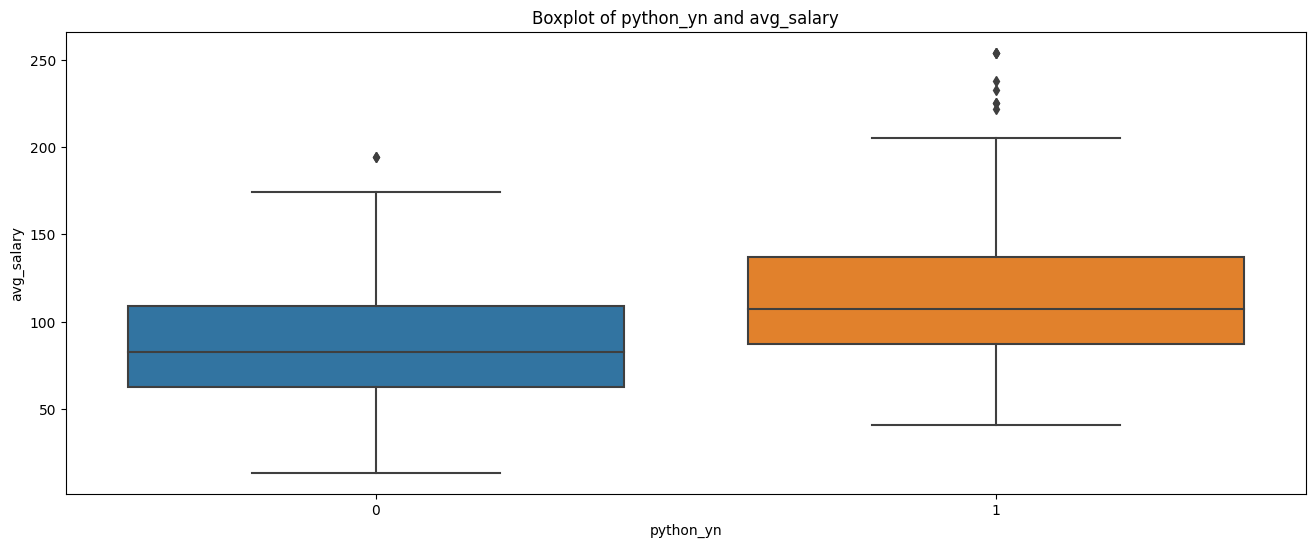

In [29]:
plt.figure(figsize=(16, 6))
plt.title('Boxplot of python_yn and avg_salary') 
ax = (sns.boxplot(data=eda_data_df, x='python_yn', y='avg_salary'))
plt.show()

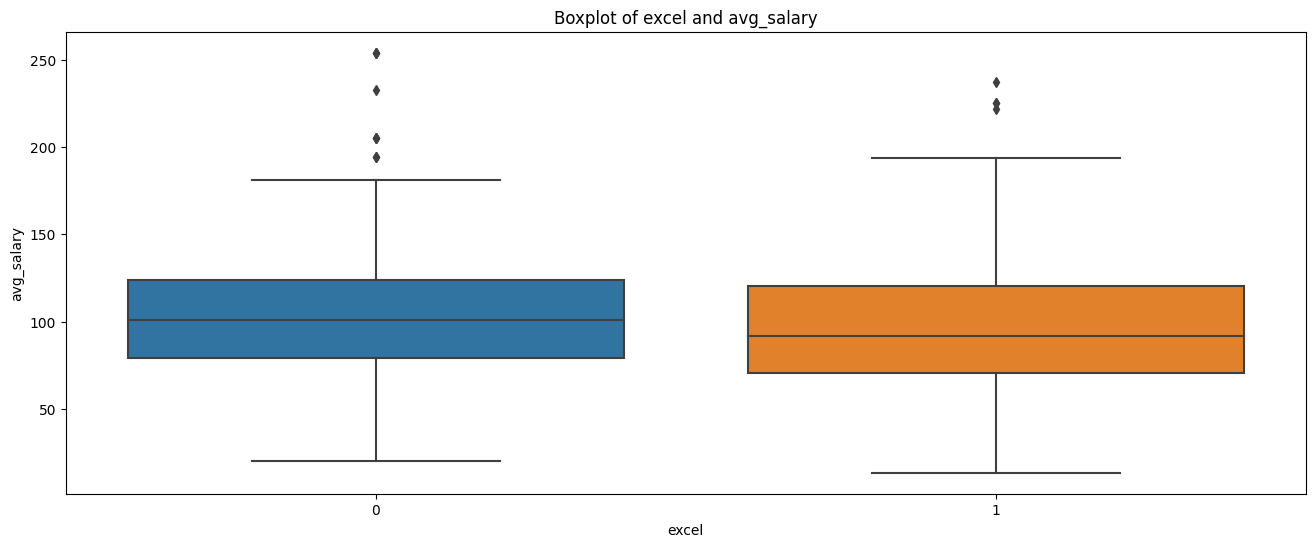

In [30]:
plt.figure(figsize=(16, 6))
plt.title('Boxplot of excel and avg_salary') 
ax = (sns.boxplot(data=eda_data_df, x='excel', y='avg_salary'))
plt.show()